# Preliminary investigation of the *UHCW* dataset
The [University Hospitals - Coventry & Warwickshire](https://www.uhcw.nhs.uk) (UHCW) has set up an online [portal](https://www.swiftqueue.co.uk/uhcw.php) to facilitate the booking of blood tests appointments in 18 centers around Coventry (UK).  


Available appointments have been recorded in the dataset `appointments.csv`. 
In this notebook we take a first look at this dataset.

## Imports

In [1]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data
Read in the `csv` file.

In [2]:
%%time
print(datetime.datetime.now().strftime("%A %d %B %Y, %H:%M:%S"))
filename = 'sample_appointments.csv'  # appointments.csv
foldername = 'Data/UHCW'
filepath = os.path.join(os.path.expanduser("~"), foldername, filename)

filesize = os.path.getsize(filepath)
if filesize > 1e6:
    print("Size of data file: {}MB.".format(filesize//1000000))
elif filesize > 1e3:
    print("Size of data file: {}KB.".format(filesize//1000))
else:
    print("Size of data file: {}B.".format(filesize))
print("Loading data...")
raw_data = pd.read_csv(filepath, sep=';')
print("Number of records: {0}.".format(raw_data.shape[0]))
print("Column names:\n{}".format("\n".join(raw_data.columns)))

Tuesday 05 February 2019, 22:56:06
Size of data file: 291MB.
Loading data...
Number of records: 5117059.
Column names:
appointment timestamp
center age group
center id
test type
grab timestamp
CPU times: user 2.52 s, sys: 192 ms, total: 2.71 s
Wall time: 2.71 s


Work with a copy, `df`:

In [3]:
%%time
print(datetime.datetime.now().strftime("%A %d %B %Y, %H:%M:%S"))

df = raw_data.copy()
df = df[['appointment timestamp', 'center id', 'center age group', 'test type', 'grab timestamp']]
df.columns = ['appointment', 'id', 'age group', 'test type', 'grab']
df['appointment'] = pd.to_datetime(df['appointment'])
df['grab'] = pd.to_datetime(df['grab'])
df = df[['id', 'test type', 'age group', 'grab', 'appointment']]

Tuesday 05 February 2019, 22:56:42
CPU times: user 1.93 s, sys: 207 ms, total: 2.14 s
Wall time: 2.14 s


## First observations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117059 entries, 0 to 5117058
Data columns (total 5 columns):
id             int64
test type      object
age group      object
grab           datetime64[ns]
appointment    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 195.2+ MB


There are 18 test centers surving 2 age groups and 5 types of blood tests:

In [7]:
df[['id', 'age group', 'test type']].nunique()

id           18
age group     2
test type     5
dtype: int64

The age groups are "child" and "adult":

In [9]:
list(df['age group'].unique())

['adult', 'child']

Each test center serves only one age group but delivers up to three types of blood test:

In [12]:
df.groupby('id')['age group'].unique()

id
10136    [adult]
10137    [adult]
10138    [adult]
10188    [adult]
10207    [adult]
10243    [adult]
10244    [adult]
10250    [adult]
10254    [child]
10263    [adult]
10266    [adult]
10294    [child]
10299    [adult]
10301    [child]
10336    [child]
10341    [adult]
10352    [adult]
10449    [adult]
Name: age group, dtype: object

In [13]:
df.groupby('id')['test type'].unique()

id
10136    [Fasting Bloods, Non Fasting Bloods, INR Test]
10137                                      [Blood Test]
10138                                      [Blood Test]
10188                            [Blood Test, INR Test]
10207                                      [Blood Test]
10243                            [Blood Test, INR Test]
10244                            [Blood Test, INR Test]
10250                            [Blood Test, INR Test]
10254                                      [Blood Test]
10263                            [Blood Test, INR Test]
10266                            [Blood Test, INR Test]
10294                                      [Blood Test]
10299                          [Glucose Tolerance Test]
10301                                      [Blood Test]
10336                                      [Blood Test]
10341                                      [Blood Test]
10352                            [Blood Test, INR Test]
10449                                      [B

We can sort the test centers by the number of test types:

In [14]:
df.groupby('id')['test type'].nunique().reset_index().sort_values(['test type', 'id'])

,id,test type
1,10137,1
2,10138,1
4,10207,1
8,10254,1
11,10294,1
12,10299,1
13,10301,1
14,10336,1
15,10341,1
17,10449,1


We can sort the centers by the number of records:

In [16]:
df.groupby('id')['test type'].count().reset_index().sort_values(['test type', 'id'])

,id,test type
8,10254,25479
14,10336,32729
12,10299,34530
11,10294,40068
13,10301,49209
2,10138,118360
9,10263,157930
15,10341,179054
17,10449,212447
1,10137,249141


We can combine these two in a new dataframe:

In [17]:
grouped_cid = df.groupby('id')
df1 = grouped_cid['test type'].nunique().reset_index()
df1['count'] = grouped_cid['test type'].count().reset_index()['test type']

df1.sort_values(by=['test type', 'count'])

,id,test type,count
8,10254,1,25479
14,10336,1,32729
12,10299,1,34530
11,10294,1,40068
13,10301,1,49209
2,10138,1,118360
15,10341,1,179054
17,10449,1,212447
1,10137,1,249141
4,10207,1,380060


To finish this preliminary investigation of the dataset, we plot the *last* booking of the appointments for test center `10254`, which delivers only one type of blood test.

In [18]:
cid = 10254
df0 = df.loc[df['id'] == cid, ['appointment', 'grab']]
df0.reset_index(drop=True, inplace=True)

In [21]:
last_grab = df0['grab'].max()

In [23]:
df0_last_booking = pd.DataFrame()
df0_last_booking['last booking'] = df0.groupby('appointment')['grab'].max()

df0_last_booking.drop(df0_last_booking[df0_last_booking['last booking'] == last_grab].index, inplace=True)
df0_last_booking.reset_index(inplace=True)

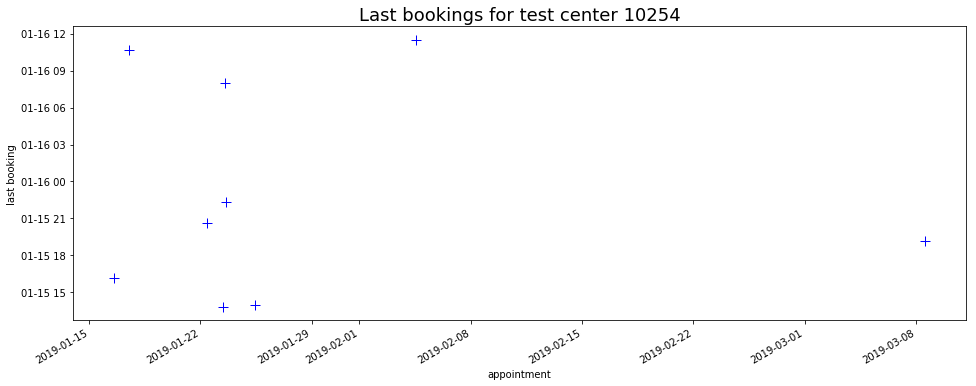

In [26]:
ax = df0_last_booking.plot(x='appointment', y='last booking', figsize=(16, 6), style='+', **{"markersize": 10, 'markeredgecolor': 'b'});
ax.set_xlabel("appointment");
ax.set_ylabel("last booking");
ax.get_legend().remove()
ax.set_title("Last bookings for test center {}".format(cid), fontsize=18);

This is **far** from satisfactory, though.  Appointments can be cancelled after booking, and rebooked again, and all this history is not visible in the above plot.
We will need more sophisticated processing to reconstruct the exact booking history of all appointments.
This we will do in the separate notebook `UHCW_reconstruction.ipynb`.